In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from scipy.stats import linregress
from config import tmdb_api_key
from config import omdb_api_key
import json
import numpy as np
import cpi

ModuleNotFoundError: No module named 'cpi'

In [ ]:
# Check that the CSV was read properly
movie_list = pd.read_csv("movies.csv")
movie_list.head()

In [2]:
# Add id column to the DataFrame
movie_list['id'] = ''
movie_list

NameError: name 'movie_list' is not defined

In [ ]:
# TMDB API call
movie=movie_list['Title'][100]
base_url="https://api.themoviedb.org/3/search/movie?"
build_url = f'https://api.themoviedb.org/3/search/movie?query={movie}&api_key={tmdb_api_key}'
response=requests.get(build_url).json()
#print(response.url)
print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
#response['results'][0]['id']

In [ ]:
#OMDB API call
url = "http://www.omdbapi.com/?t="
#api_key = "&apikey=" + api_key
api_key_url = "&apikey=" + omdb_api_key
#print(api_key_url)
response = requests.get(url + "Jack Reacher" + api_key_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
# Loop through the CSV's Title column to call said movie from the API
# Create an empty list to store unfound movies in the TMDB database into
unfound_movies = []
for index, row in movie_list.iterrows():
    movie=movie_list['Title'][index]
    base_url="https://api.themoviedb.org/3/search/movie?"
    build_url = f'{base_url}query={movie}&api_key={tmdb_api_key}'
    response=requests.get(build_url).json()
    #print(response.url)

    try:
        movie_list.loc[index, "id"] = response['results'][0]['id']
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "id"] = np.nan
        unfound_movies.append(movie_list.loc[index, "Title"])

In [ ]:
# View the movies not found in the database
unfound_movies

In [ ]:
#Print the DataFrame along with it's shape
print(movie_list.shape)
movie_list

In [ ]:
# Export the City_Data into a csv
#movie_list.to_csv("movie_list.csv")

In [ ]:
# movie_list_df = movie_list.loc[movie_list['id']=='NaN']
# movie_list_df

In [ ]:
#Drop NaN rows
movie_list.dropna(how='any',inplace=True)

In [ ]:
#Check size of Data Frame
movie_list.shape

In [ ]:
#Add columns name to the DataFrame
movie_list[['imdb_id',
            'budget',
            'genres',
            'revenue',
            'runtime',
            'popularity',
            'release_date',
            'production_countries'
            ,'tmdb_rating']] =''
movie_list

In [ ]:
# # Defining the path for each column value

#imdb_id = url_byid_response['imdb_id']
#release_date = url_byid_response['release_date']
#url_byid_response['revenue']
#url_byid_response['runtime']

# #extracting genre names from list
# for i in range(0,len(url_byid_response['genres'])):
#     print(url_byid_response['genres'][i]['name'])

# #extracting genre names from list
# for i in range(0,len(url_byid_response['production_countries'])):
#     print(url_byid_response['production_countries'][i]['name'])

#url_byid_response['popularity']
#url_byid_response['budget']

#url_byid_response['vote_average']


In [ ]:
# #API call, search movie by ID
# for i in range(0,len(movie_list['Title']))
#     movie_id=movie_list['id'][i]
#     url_ById = "https://api.themoviedb.org/3/movie/"
#     build_url_ById=f"{url_ById}{movie_id}?api_key={api_key}"
#     url_byid_response=requests.get(build_url_ById).json()
#     #print(json.dumps(url_byid_response, indent=4, sort_keys=True))

In [ ]:
# Loop through each movie's title for the API call and store the data we want to analyze into our DataFrame

for index, row in movie_list.iterrows():
# Create empty lists to store multiple-value columns' data into 
    genres = []
    production_countries = []
    try:
        movie_id=movie_list['id'][index]
        base_url_ById = "https://api.themoviedb.org/3/movie/"
        build_url_ById=f"{base_url_ById}{movie_id}?api_key={tmdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_id"] = url_byid_response['imdb_id']
        movie_list.loc[index, "release_date"] = url_byid_response['release_date']
        movie_list.loc[index, "revenue"] = url_byid_response['revenue']
        movie_list.loc[index, "runtime"]= url_byid_response['runtime']
        movie_list.loc[index, "Title"]= url_byid_response['title']

        
        
        #extracting genre names from list
        for i in range(0,len(url_byid_response['genres'])):
            current_genre = url_byid_response['genres'][i]['name']
            genres.append(current_genre)
            

        #extracting production_countries names from list
        for i in range(0,len(url_byid_response['production_countries'])):
            current_prod_country = url_byid_response['production_countries'][i]['name']
            production_countries.append(current_prod_country)

        movie_list.loc[index, "popularity"] = url_byid_response['popularity']
        movie_list.loc[index, "budget"] = url_byid_response['budget']
        movie_list.loc[index, "tmdb_rating"] = url_byid_response['vote_average']
        movie_list.loc[index, "genres"] = ", ".join(genres)
        movie_list.loc[index, "production_countries"] = ", ".join(production_countries)
    except (KeyError, IndexError):
        # If no movie name is found, set the movie id as NaN .
        movie_list.loc[index, "imdb_id"] = np.nan
        movie_list.loc[index, "release_date"] = np.nan
        movie_list.loc[index, "revenue"] = np.nan
        movie_list.loc[index, "runtime"]= np.nan
        movie_list.loc[index, "popularity"] = np.nan
        movie_list.loc[index, "budget"] = np.nan
        movie_list.loc[index, "tmdb_rating"] = np.nan
        movie_list.loc[index, "production_countries"] = np.nan
        movie_list.loc[index, "genres"] = np.nan

        

In [ ]:
movie_list.head()

In [ ]:
movie_list.shape

In [ ]:
# Create a new "Year" column from the "release date" by making a new df converting to datetime
movie_list["release_date"] = pd.to_datetime(movie_list["release_date"])
movie_list["Year"] = movie_list["release_date"].dt.year
# movie_list.drop("release_date", axis=1, inplace=True)
movie_list=movie_list[["Title", "Year", "id", "imdb_id", "genres", "runtime", "budget", "revenue", "production_countries",
           "popularity", "tmdb_rating"]]
movie_list

In [ ]:
# # Export the movie_df into a csv
# movie_list.to_csv("movie_df.csv")

In [ ]:
# View if a movie had 0 budget or not (true/false)
no_budget = movie_list["budget"]==0
# null_imdb_id = movie_list.loc[movie_list]
no_budget

In [ ]:
# Create a DataFrame from the last block's result
no_budget_df = movie_list[no_budget]
# len(no_budget_df["budget"])
# no_budget_df

In [ ]:
# View how many movies with no budget had no revenue either
# no_revenue = no_budget_df["revenue"]==0
# no_revenue.value_counts()

In [ ]:
# Removing rows with zero budget movies
movie_list=movie_list[~no_budget]
movie_list

In [ ]:
# View if a movie had 0 budget or not (true/false)
movie_list["budget"].min()


In [ ]:
# View if a movie had 0 revenue or not (true/false)
no_revenue_1 = movie_list["revenue"]==0
# null_imdb_id = movie_list.loc[movie_list]
no_revenue_1

In [ ]:
# Removing rows with zero revenue movies
movie_list=movie_list[~no_revenue_1]
movie_list

In [ ]:
# View if a movie had 0 revenue or not (true/false)
movie_list["revenue"].min()


In [ ]:
# Adjusting for inflation over the years
budget_past = 438656843
budget_year = 1991
budget_2023 = cpi.inflate(budget_past, budget_year)
round(budget_2023, 2)

In [ ]:
movie_list['infl_adj_budget'] = ''
movie_list['infl_adj_revenue'] = ''
movie_list

In [ ]:
# Defining a function to calculate a running inflation adjusted value for a column in a dataframe
def inflate_column(data, column):
    #     Adjust for inflation the series of values in column of the dataframe data
    return data.apply(lambda x: cpi.inflate(x[column], x.Year), axis=1)

# adjust the production budget 
movie_list['budget'] = movie_list['budget'].astype(int)
movie_list['infl_adj_budget'] = inflate_column(movie_list, 'budget')
#adjust the worldwide gross profits
movie_list['infl_adj_revenue'] = inflate_column(movie_list, 'revenue').astype(float)

# calculate the real worldwide net profit
movie_list['real_profit'] = movie_list.apply(lambda x: x.infl_adj_revenue - x.infl_adj_budget, axis=1)
movie_list

In [ ]:
# Looking at a sampling of dataframe
print(movie_list.shape)
movie_list.sample(5)

In [ ]:
# #OMDB API call
# url = "http://www.omdbapi.com/?t="
# #api_key = "&apikey=" + api_key
# api_key_url = "&apikey=" + omdb_api_key
# #print(api_key_url)
# response = requests.get(url + "Jack Reacher" + api_key_url).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
for index, row in movie_list.iterrows():
    try:
        imdb_id=movie_list["imdb_id"][index]
        base_url_ById = "http://www.omdbapi.com/?i="
        build_url_ById=f"{base_url_ById}{imdb_id}&apikey={omdb_api_key}"
        url_byid_response=requests.get(build_url_ById).json()
        movie_list.loc[index, "imdb_rating"] = url_byid_response['imdbRating']
        movie_list.loc[index, "imdb_votes"] = url_byid_response['imdbVotes']
    except:
        movie_list.loc[index, "imdb_rating"] = np.nan
        movie_list.loc[index, "imdb_votes"] = np.nan
movie_list

# Movie Data Analysis

In [ ]:
# Define custom bin edges
bin_edges = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels =["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]

# Cut the data into custom intervals
movie_list['Decades'] = pd.cut(movie_list['Year'], bins=bin_edges,labels=labels)
movie_list

In [ ]:
# Sorting movie_list df revenue column ascending=False
sorted_revenue_desc = movie_list.sort_values(by='infl_adj_revenue', ascending=False)
top_ten_df = sorted_revenue_desc.iloc[0:10, :] 
top_ten_df

In [ ]:
# Create a bar chart to display top 10 grossing movies

top_ten_df.plot("Title", "infl_adj_revenue", kind='bar', alpha=0.6, color='blue', title="Top 10 Grossing Movies (1922-2022)",
                xlabel="Movie Titles", ylabel="Movie Revenue", legend='')


# ax=top_ten_df.plot("Title", "revenue", kind='bar', alpha=0.6, color='blue', title="Top 10 Grossing Movies (1922-2022)",
#                 xlabel="Movie Titles", ylabel="Movie Revenue", legend='')
# ax.set_xticklabels(top_ten_df['Title'], rotation=45)
# plt.show()

In [ ]:
# Create a bar chart based upon the above data
y_axis=movie_list.groupby('Decades').count()['Title']
y_axis.plot(kind='bar', alpha=0.6, color='blue', title="Number of Movies per decade", xlabel="Decades", ylabel="Number of Movies")

## Pie Chart

In [ ]:
# Minimum Budget
min_budget = movie_list['infl_adj_budget'].min()
# Average Budget
avg_budget = movie_list['infl_adj_budget'].mean()
# Maximum Budget
max_budget = movie_list['infl_adj_budget'].max()
diff = (max_budget-min_budget)/3
# Define the bins and labels
bins=[min_budget,round(min_budget+diff),round(min_budget+2*diff),round(min_budget+3*diff)]
labels = ['Low Budget', 'Average Budget', 'High Budget']
# Cut the 'Budget' column into categories and create a new column 'Budget_Category'
movie_list['Budget_Category'] = pd.cut(movie_list['infl_adj_budget'], bins=bins, labels=labels)
movie_list.sample(10)

In [ ]:
# Pie plot showing the distribution of Budget category using pyplot
budget_distribution = movie_list['Budget_Category'].value_counts().reset_index()
print(budget_distribution)
#create y label
y = [budget_distribution['count'][0],budget_distribution['count'][1],budget_distribution['count'][2]]
#Show Pie Plot
plt.pie(y,autopct='%1.1f%%',labels=['Low Budget','Average Budget','High Budget'])
plt.show()

In [ ]:
movie_list[['primary_genre', 'sub_genre_1', 'sub_genre_2', 'sub_genre_3', 'sub_genre_4', 'sub_genre_5']] = movie_list['genres'].str.split(', ', expand=True, n=5)
movie_list

In [ ]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,)
# colors = plt.cm.Paired(range(len(primary_genre)))
primary_genre = movie_list['primary_genre'].value_counts()
primary_genre

In [ ]:
plt.figure(figsize=(16, 16))
plt.pie(primary_genre, autopct= "%1.1f%%", shadow=True, startangle=140, pctdistance=1.2, explode=explode)
plt.legend(categories, loc='best', bbox_to_anchor=(1, 1))
plt.title('Primary Genres')
plt.show()

## Bar Plot

<Figure size 1000x200 with 0 Axes>

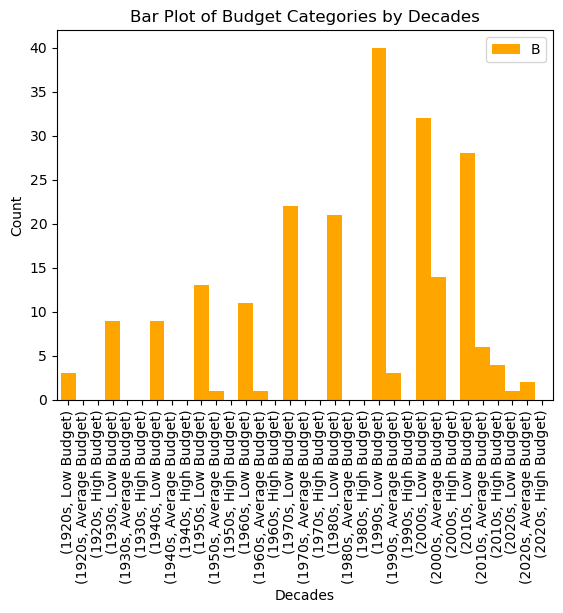

In [379]:
#Bar plot Budget Categories by Decades
grouped_df = movie_list.groupby(['Decades', 'Budget_Category'])['Title'].count().reset_index()
pivot_df=grouped_df.set_index(['Decades', 'Budget_Category'])
# Set the figure size
plt.figure(figsize=(10,2))  # Width, Height in inches
# Create a stacked bar plot
pivot_df.plot(kind='bar',width=1,color='orange', stacked=True)
# Add labels and a title
plt.xlabel('Decades')
plt.ylabel('Count')
plt.title('Bar Plot of Budget Categories by Decades')
plt.legend("Budget")
# Show the plot
plt.show()

## Histogram Plotting

Text(0.5, 1.0, 'Histogram of Budget')

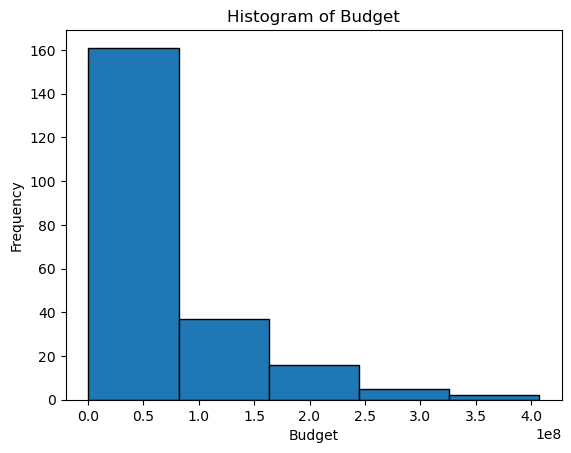

In [381]:
# Plot a histogram of budget
plt.hist(movie_list['infl_adj_budget'],bins=5, edgecolor='k')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Budget')

In [382]:
from scipy.stats import shapiro
DataToTest = movie_list['infl_adj_budget']
stat,p = shapiro(DataToTest)
print(f"stat: {stat},p: {p}")
if(p>0.05):
    print("Accept NULL Hypothesis :Budget data is normally Distributed")
else:
    print("Reject NULL Hypothesis: Budget data is not normally Distributed")

stat: 0.7853260636329651,p: 1.037553619625597e-16
Reject NULL Hypothesis: Budget data is not normally Distributed


## Scatter Plots with Linear Regression

In [383]:
# Creating a function for computing linear regression
def lin_regress(xval, yval, x_label, y_label): 
    x_values = xval
    y_values = yval
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='blueviolet')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=15,color="red")
    plt.legend(['Regression Line: y = {:.2f}x + {:.2f}'.format(slope, intercept)])
    print("The r-value is: ",rvalue)
    plt.show()

The r-value is:  0.010447790724258036


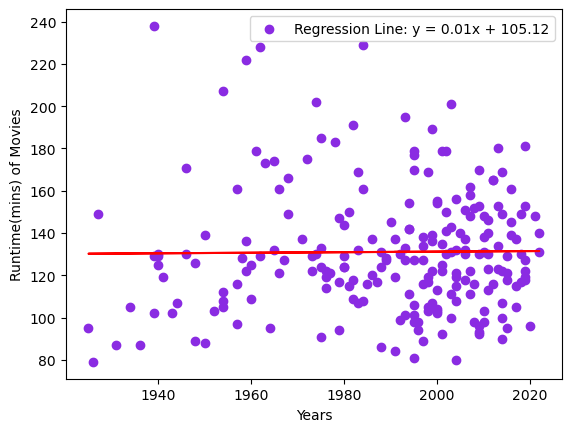

In [384]:
# Create a scatter plot for regression analysis

xval = movie_list['Year']
yval = movie_list['runtime'].astype(int)
x_label='Years'
y_label='Runtime(mins) of Movies'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  -0.0832371390895369


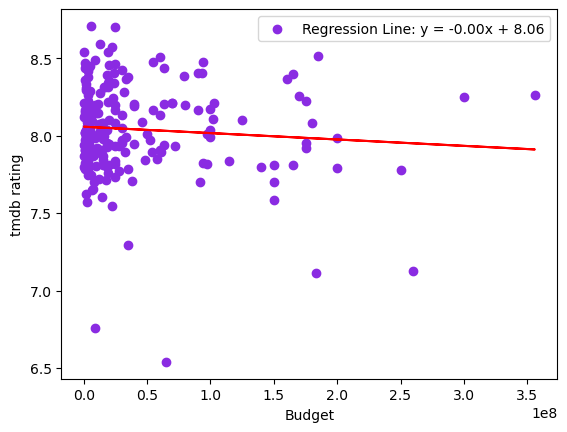

In [385]:
# Create a scatter plot for regression analysis: Budget vs. tmdb

xval = movie_list['budget'].astype(int)
yval = movie_list['tmdb_rating'].astype(float)
x_label='Budget'
y_label='tmdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  -0.05240744897982001


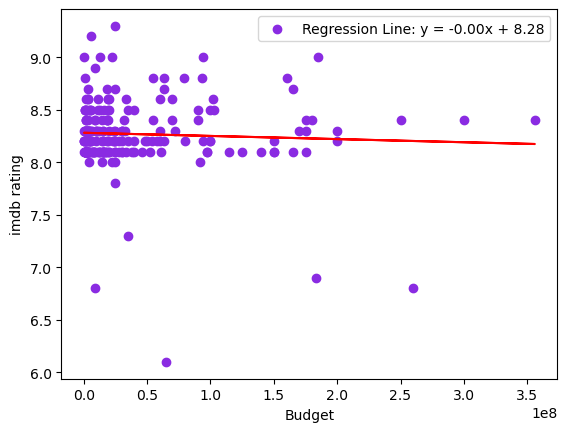

In [386]:
# Create a scatter plot for regression analysis: Budget vs. imbd Rating

xval = movie_list['budget'].astype(int)
yval = movie_list['imdb_rating'].astype(float)
x_label='Budget'
y_label='imdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  0.02861426922820671


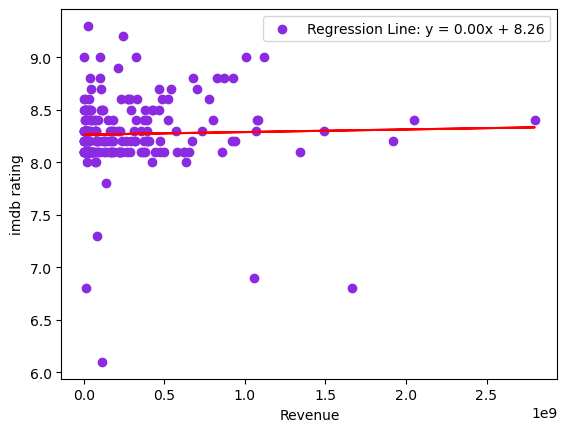

In [387]:
# Create a scatter plot for regression analysis: Revenue vs. imbd Rating

xval = movie_list['revenue'].astype(float)
yval = movie_list['imdb_rating'].astype(float)
x_label='Revenue'
y_label='imdb rating'

lin_regress(xval, yval, x_label, y_label)

The r-value is:  0.1421159076299597


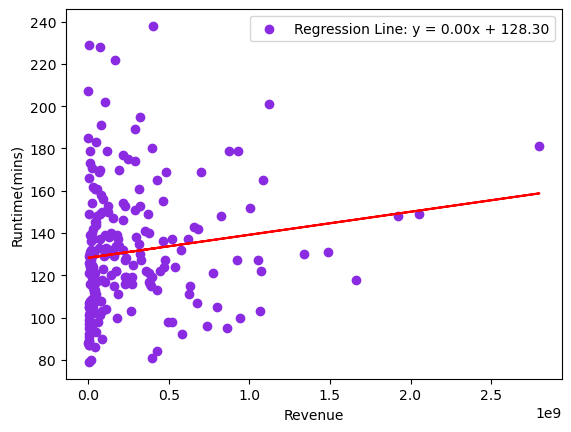

In [388]:
# Create a scatter plot for regression analysis: Revenue vs. Runtime

xval = movie_list['revenue'].astype(float)
yval = movie_list['runtime'].astype(int)
x_label='Revenue'
y_label='Runtime(mins)'

lin_regress(xval, yval, x_label, y_label)

# Data Testing

## 

In [389]:
#TEST NULL HYPOTHESIS(budget and revenue)
#H0: There is a significant association between budget and revenue of a movie.
#H1: There is no significant association between budget and revenue of a movie
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(movie_list['infl_adj_budget'], movie_list['infl_adj_revenue'])

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05  # Significance level

if p < alpha:
    print("Accept Null Hypothesis: There is a significant association between budget and revenue of a movie.")
else:
    print("Reject Null Hypothesis:There is no significant association between budget and revenue.")

Chi-Square Statistic: 47072.999999999985
P-value: 0.24293523473139747
Reject Null Hypothesis:There is no significant association between budget and revenue.


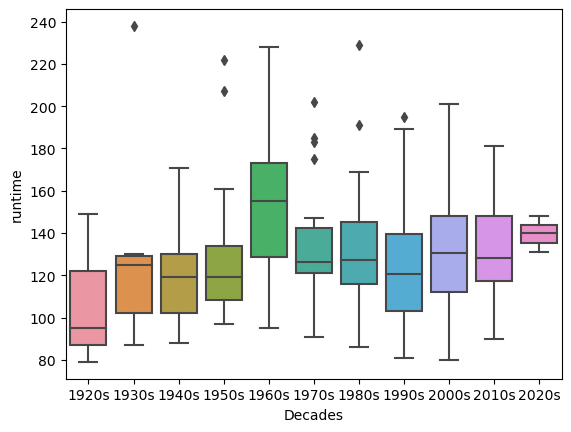

In [390]:
#Identifying Outliers in Movie Runtimes Over the Years
import seaborn as sns
ax = sns.boxplot(x='Decades',y='runtime',data=movie_list)

# Incorporating Oscar and Golden Globe Data

### Oscar dataset import and cleaning

In [391]:
# Import the Oscar csv to analyze
oscar_list = pd.read_csv("the_oscar_award.csv")
print(oscar_list.shape)
oscar_list.head(2)

(10765, 7)


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


In [392]:
# Check for NaN values in the film column of the Oscar List
oscar_list["film"].isnull().value_counts()

film
False    10450
True       315
Name: count, dtype: int64

In [393]:
# Drop the NaN values and the "False" winners to clean the data
oscar_list.dropna(how="any", inplace=True)
oscar_winners = oscar_list["winner"]==True

oscars = oscar_list[oscar_winners]
print(oscars.shape)
oscars

(2149, 7)


,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...,...
10743,2022,2023,95,SOUND,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,True
10745,2022,2023,95,VISUAL EFFECTS,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,True
10753,2022,2023,95,WRITING (Adapted Screenplay),Screenplay by Sarah Polley,Women Talking,True
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True


In [394]:
# Count the number of wins each film has and turn that series into a DataFrame
oscar_wins = oscars[["film", "year_film"]].value_counts()
oscar_win_df = oscar_wins.reset_index()
oscar_win_df

,film,year_film,count
0,Titanic,1997,11
1,Ben-Hur,1959,11
2,The Lord of the Rings: The Return of the King,2003,11
3,West Side Story,1961,10
4,The Last Emperor,1987,9
...,...,...,...
1325,Knighty Knight Bugs,1958,1
1326,Kokoda Front Line!,1942,1
1327,Kolya,1996,1
1328,Kon-Tiki,1951,1


In [395]:
# Rename the columns of the DataFrame to cleanly merge with the movie data
oscar_win_df = oscar_win_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'count': 'Oscar_Wins'})
oscar_win_df

,Title,Year,Oscar_Wins
0,Titanic,1997,11
1,Ben-Hur,1959,11
2,The Lord of the Rings: The Return of the King,2003,11
3,West Side Story,1961,10
4,The Last Emperor,1987,9
...,...,...,...
1325,Knighty Knight Bugs,1958,1
1326,Kokoda Front Line!,1942,1
1327,Kolya,1996,1
1328,Kon-Tiki,1951,1


### Golden Globe dataset import and cleaning

In [396]:
# Import the golden globes csv to analyze
gglobe_list = pd.read_csv("golden_globe_awards.csv")
print(gglobe_list.shape)
gglobe_list.head()

# gglobe_list

(7991, 7)


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [397]:
# Check for NaN values in the film column of the Golden Globe List
gglobe_list["film"].isnull().value_counts()

film
False    6191
True     1800
Name: count, dtype: int64

In [398]:
# Drop the NaN values and the "False" winners to clean the data
gglobe_list.dropna(how="any", inplace=True)
gglobe_winners = gglobe_list["win"]==True
gglobe_winners

gglobes = gglobe_list[gglobe_winners]
print(gglobes.shape)
gglobes

(1400, 7)


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
5,1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True
...,...,...,...,...,...,...,...
7964,2019,2020,77,Best Performance by an Actor In A Television S...,Brian Cox,Succession,True
7969,2019,2020,77,Best Performance by an Actress in a Television...,Phoebe Waller-Bridge,Fleabag,True
7974,2019,2020,77,Best Performance by an Actor in a Television S...,Ramy Youssef,Ramy,True
7979,2019,2020,77,Best Performance by an Actress in a Supporting...,Patricia Arquette,"Act, The",True


In [399]:
# Count the number of wins each film has and turn that series into a DataFrame
gglobe_count = gglobes[["film", "year_film"]].value_counts()
gglobe_win_df = gglobe_count.reset_index()
gglobe_win_df

,film,year_film,count
0,La La Land,2016,6
1,Midnight Express,1978,5
2,One Flew Over The Cuckoo's Nest,1975,5
3,Lawrence Of Arabia,1962,5
4,"Graduate, The",1967,4
...,...,...,...
1116,Happy Feet,2006,1
1117,"Happy Road, The",1957,1
1118,Happy-Go-Lucky,2008,1
1119,Harry & Tonto,1974,1


In [400]:
# Rename the columns of the DataFrame to cleanly merge with the movie data
gglobe_win_df = gglobe_win_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'count': 'Golden_Globe_Wins'})
gglobe_win_df

,Title,Year,Golden_Globe_Wins
0,La La Land,2016,6
1,Midnight Express,1978,5
2,One Flew Over The Cuckoo's Nest,1975,5
3,Lawrence Of Arabia,1962,5
4,"Graduate, The",1967,4
...,...,...,...
1116,Happy Feet,2006,1
1117,"Happy Road, The",1957,1
1118,Happy-Go-Lucky,2008,1
1119,Harry & Tonto,1974,1


## Merging the Oscars and Golden Globes DataFrames into the Movie List DataFrame

In [401]:
# Referencing the movie_list for ease of coding
print(movie_list.shape)
movie_list.head(1)

(221, 18)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category
0,The Shawshank Redemption,1994,278,tt0111161,"Drama, Crime",142,25000000,28341469,United States of America,124.168,8.703,4.936825e+07,5.596675e+07,6.598499e+06,9.3,"2,802,199",1990s,Low Budget


In [402]:
# Individually merge the Oscars and Golden Globes DataFrames into the master movie list
oscar_awards = pd.merge(movie_list, oscar_win_df, how="inner", on=["Title", "Year"])
oscar_awards.head()

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins
0,The Godfather,1972,238,tt0068646,"Drama, Crime",175,6000000,245066411,United States of America,118.372,8.709,4.200789e+07,1.715787e+09,1.673779e+09,9.2,"1,954,449",1970s,Low Budget,3
1,The Dark Knight,2008,155,tt0468569,"Drama, Action, Crime, Thriller",152,185000000,1004558444,"United Kingdom, United States of America",93.061,8.512,2.514650e+08,1.365467e+09,1.114002e+09,9.0,"2,786,837",2000s,Average Budget,2
2,The Godfather Part II,1974,240,tt0071562,"Drama, Crime",202,13000000,102600000,United States of America,61.918,8.591,7.717069e+07,6.090548e+08,5.318841e+08,9.0,"1,327,261",1970s,Low Budget,6
3,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062",1990s,Low Budget,7
4,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154",2000s,Average Budget,11


In [403]:
both_awards = pd.merge(oscar_awards, gglobe_win_df, how="inner", on=["Title", "Year"])
print(both_awards.shape)
both_awards

(38, 20)


,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins,Golden_Globe_Wins
0,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062",1990s,Low Budget,7,2
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154",2000s,Average Budget,11,3
2,Pulp Fiction,1994,680,tt0110912,"Thriller, Crime",154,8500000,213900000,United States of America,79.178,8.488,1.678521e+07,4.223948e+08,4.056096e+08,8.9,"2,151,243",1990s,Low Budget,1,1
3,Forrest Gump,1994,13,tt0109830,"Comedy, Drama, Romance",142,55000000,677387716,United States of America,62.719,8.477,1.086102e+08,1.337658e+09,1.229048e+09,8.8,"2,183,967",1990s,Low Budget,6,2
4,Saving Private Ryan,1998,857,tt0120815,"Drama, History, War",169,70000000,481840909,United States of America,52.884,8.209,1.256801e+08,8.651114e+08,7.394313e+08,8.6,"1,452,795",1990s,Low Budget,5,1
5,Gladiator,2000,98,tt0172495,"Action, Drama, Adventure",155,103000000,465361176,"United Kingdom, United States of America",60.281,8.209,1.750492e+08,7.908843e+08,6.158351e+08,8.5,"1,566,334",1990s,Average Budget,5,2
6,Whiplash,2014,244786,tt2582802,"Drama, Music",107,3300000,13092000,United States of America,55.515,8.381,4.079487e+06,1.618444e+07,1.210495e+07,8.5,"935,843",2010s,Low Budget,3,1
7,Apocalypse Now,1979,28,tt0078788,"Drama, War",147,31500000,150000000,United States of America,33.804,8.284,1.269784e+08,6.046591e+08,4.776807e+08,8.4,"693,232",1970s,Low Budget,2,3
8,Django Unchained,2012,68718,tt1853728,"Drama, Western",165,100000000,425368238,United States of America,42.09,8.171,1.274663e+08,5.422012e+08,4.147349e+08,8.5,"1,638,564",2010s,Low Budget,2,2
9,American Beauty,1999,14,tt0169547,Drama,122,15000000,356296601,United States of America,28.352,8.021,2.634949e+07,6.258822e+08,5.995328e+08,8.3,"1,187,726",1990s,Low Budget,5,2


In [404]:
both_awards['cumulative_awards'] = ''
for index,row in both_awards.iterrows():
    both_awards.loc[index, "cumulative_awards"] = both_awards.loc[index,'Oscar_Wins']+both_awards.loc[index,'Golden_Globe_Wins']

both_awards.sort_values(by='cumulative_awards',ascending = False,inplace=True)
both_awards.head(50)

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,...,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins,Golden_Globe_Wins,cumulative_awards
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,...,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154",2000s,Average Budget,11,3,14
30,Ben-Hur,1959,665,tt0052618,"Action, Drama, History, Adventure",222,15000000,164000000,United States of America,25.903,...,1.508531e+08,1.649327e+09,1.498474e+09,8.1,"248,461",1950s,Average Budget,11,2,13
35,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,...,6.671927e+07,2.357553e+08,1.690360e+08,8.0,"237,597",1980s,Low Budget,8,4,12
11,Amadeus,1984,279,tt0086879,"History, Music, Drama",161,18000000,51973029,United States of America,20.181,...,5.070058e+07,1.463924e+08,9.569179e+07,8.4,"418,227",1980s,Low Budget,8,3,11
29,On the Waterfront,1954,654,tt0047296,"Crime, Drama",108,910000,9600000,United States of America,17.623,...,9.900225e+06,1.044419e+08,9.454171e+07,8.1,"161,124",1950s,Low Budget,8,3,11
0,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,...,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062",1990s,Low Budget,7,2,9
3,Forrest Gump,1994,13,tt0109830,"Comedy, Drama, Romance",142,55000000,677387716,United States of America,62.719,...,1.086102e+08,1.337658e+09,1.229048e+09,8.8,"2,183,967",1990s,Low Budget,6,2,8
34,Network,1976,10774,tt0074958,Drama,122,3800000,23689877,United States of America,20.399,...,1.954462e+07,1.218447e+08,1.023000e+08,8.1,"165,719",1970s,Low Budget,4,4,8
23,A Beautiful Mind,2001,453,tt0268978,"Drama, Romance",135,58000000,316800000,United States of America,30.468,...,9.584410e+07,5.235071e+08,4.276630e+08,8.2,"963,266",2000s,Low Budget,4,3,7
9,American Beauty,1999,14,tt0169547,Drama,122,15000000,356296601,United States of America,28.352,...,2.634949e+07,6.258822e+08,5.995328e+08,8.3,"1,187,726",1990s,Low Budget,5,2,7


In [405]:
top20_both_awards = both_awards.sort_values(by='cumulative_awards', ascending=False)
top20_movies = top20_both_awards.iloc[0:20, :] 
top20_movies.head()

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,...,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Oscar_Wins,Golden_Globe_Wins,cumulative_awards
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,...,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154",2000s,Average Budget,11,3,14
30,Ben-Hur,1959,665,tt0052618,"Action, Drama, History, Adventure",222,15000000,164000000,United States of America,25.903,...,1.508531e+08,1.649327e+09,1.498474e+09,8.1,"248,461",1950s,Average Budget,11,2,13
35,Gandhi,1982,783,tt0083987,"Drama, History",191,22000000,77737889,"India, United Kingdom, United States of America",13.73,...,6.671927e+07,2.357553e+08,1.690360e+08,8.0,"237,597",1980s,Low Budget,8,4,12
11,Amadeus,1984,279,tt0086879,"History, Music, Drama",161,18000000,51973029,United States of America,20.181,...,5.070058e+07,1.463924e+08,9.569179e+07,8.4,"418,227",1980s,Low Budget,8,3,11
29,On the Waterfront,1954,654,tt0047296,"Crime, Drama",108,910000,9600000,United States of America,17.623,...,9.900225e+06,1.044419e+08,9.454171e+07,8.1,"161,124",1950s,Low Budget,8,3,11


<BarContainer object of 20 artists>

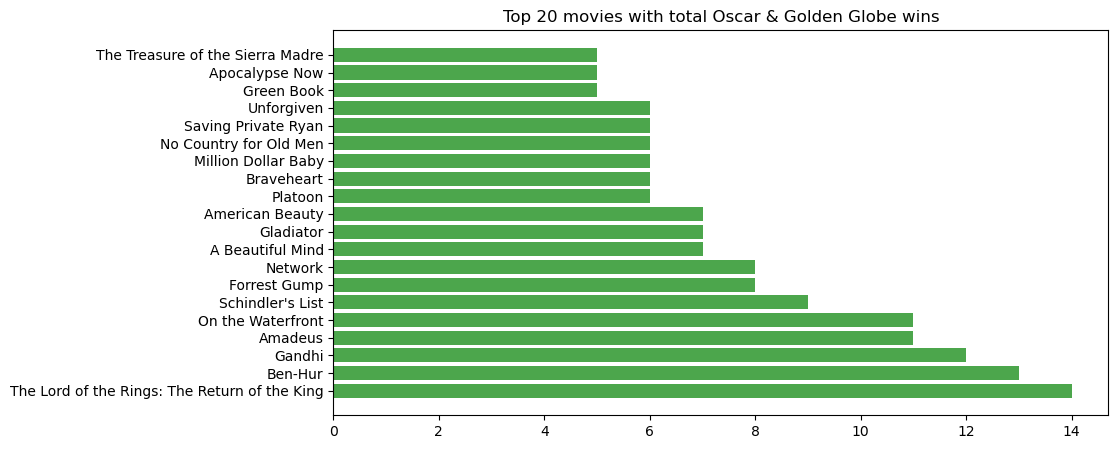

In [406]:
# plt.barh(x, y)
x=top20_movies['Title']
y=top20_movies['cumulative_awards']
plt.figure(figsize=(10,5))
plt.title('Top 20 movies with total Oscar & Golden Globe wins')
plt.barh(x,y,color='green',alpha=0.7)

In [418]:
decades_sorted_award=both_awards['Decades'].value_counts()
decades_sorted_award

Decades
1990s    11
2000s     7
2010s     7
1970s     5
1950s     3
1980s     3
1940s     1
1960s     1
1920s     0
1930s     0
2020s     0
Name: count, dtype: int64

In [434]:
decade_groupby = both_awards.groupby('Decades')
decades_sum=decade_groupby['cumulative_awards'].sum().reset_index()

# plt.barh(x, y)
# y=decades_sum['Decades']
# x=decades_sum['cumulative_awards']
# plt.figure(figsize=(10,5))
# plt.title('Top 20 movies with total Oscar & Golden Globe wins')
# plt.barh(x,y,color='red',alpha=0.7)


In [410]:
gglobe_awards = pd.merge(movie_list, gglobe_win_df, how="inner", on=["Title", "Year"])
gglobe_awards

,Title,Year,id,imdb_id,genres,runtime,budget,revenue,production_countries,popularity,tmdb_rating,infl_adj_budget,infl_adj_revenue,real_profit,imdb_rating,imdb_votes,Decades,Budget_Category,Golden_Globe_Wins
0,Schindler's List,1993,424,tt0108052,"Drama, History, War",195,22000000,321365567,United States of America,57.346,8.572,4.455647e+07,6.508598e+08,6.063033e+08,9.0,"1,410,062",1990s,Low Budget,2
1,The Lord of the Rings: The Return of the King,2003,122,tt0167260,"Adventure, Fantasy, Action",201,94000000,1118888979,"New Zealand, United States of America",82.827,8.474,1.495085e+08,1.779611e+09,1.630103e+09,9.0,"1,920,154",2000s,Average Budget,3
2,Pulp Fiction,1994,680,tt0110912,"Thriller, Crime",154,8500000,213900000,United States of America,79.178,8.488,1.678521e+07,4.223948e+08,4.056096e+08,8.9,"2,151,243",1990s,Low Budget,1
3,Forrest Gump,1994,13,tt0109830,"Comedy, Drama, Romance",142,55000000,677387716,United States of America,62.719,8.477,1.086102e+08,1.337658e+09,1.229048e+09,8.8,"2,183,967",1990s,Low Budget,2
4,Saving Private Ryan,1998,857,tt0120815,"Drama, History, War",169,70000000,481840909,United States of America,52.884,8.209,1.256801e+08,8.651114e+08,7.394313e+08,8.6,"1,452,795",1990s,Low Budget,1
5,Psycho,1960,539,tt0054215,"Horror, Drama, Thriller",109,806947,32000000,United States of America,41.575,8.435,7.978280e+06,3.163838e+08,3.084055e+08,8.5,"700,356",1950s,Low Budget,1
6,Gladiator,2000,98,tt0172495,"Action, Drama, Adventure",155,103000000,465361176,"United Kingdom, United States of America",60.281,8.209,1.750492e+08,7.908843e+08,6.158351e+08,8.5,"1,566,334",1990s,Average Budget,2
7,Whiplash,2014,244786,tt2582802,"Drama, Music",107,3300000,13092000,United States of America,55.515,8.381,4.079487e+06,1.618444e+07,1.210495e+07,8.5,"935,843",2010s,Low Budget,1
8,Apocalypse Now,1979,28,tt0078788,"Drama, War",147,31500000,150000000,United States of America,33.804,8.284,1.269784e+08,6.046591e+08,4.776807e+08,8.4,"693,232",1970s,Low Budget,3
9,Django Unchained,2012,68718,tt1853728,"Drama, Western",165,100000000,425368238,United States of America,42.09,8.171,1.274663e+08,5.422012e+08,4.147349e+08,8.5,"1,638,564",2010s,Low Budget,2


In [411]:
# # Merging the oscar list and golden globe list
# merged_awards_df = pd.merge(oscar_list, gglobe_list, how="left", on=["film", "year_film"])
# print(merged_awards_df.shape)
# merged_awards_df.sample(5)

In [412]:
# # Cleaning the data by dropping unneeded columns
# merged_awards_df = merged_awards_df[["film", "year_film", "winner", "win", "name", "nominee"]]
# merged_awards_df = merged_awards_df.rename(columns={'film': 'Title', 'year_film': 'Year', 'winner': 'Oscar_winner',
#                                                    'win': 'Golden_Globe_winner', 'name': 'Oscar_nominee',
#                                                    'nominee': 'Golden_Globe_nominee'})
# merged_awards_df

### Pulling genre and produciton country information out of the DataFrame

In [413]:
# # This will split a cell with multiple values back into a list
# newvar = movie_list.loc[9, "production_countries"].split(", ")
# newvar[2]

In [414]:
# # Testing the Pandas "explode" function
# checkexplode = movie_list["genres"].explode('drama')
# checkexplode

In [415]:
# Create a "contains value" function in Python to call on to pull specific genre or production country information
def contains_value(val, search_val):
    return search_val in val.split(', ')

In [416]:
# crime_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Crime'))]
# drama_df = movie_list[movie_list['genres'].apply(lambda x: contains_value(x, 'Drama'))]


# # merge1_df = pd.merge(crime_df, drama_df, on=["Title", "Year", "id", "budget", "revenue", "popularity"])
# # merge1_df
# # merge1_df.groupby["Year"]
# # merge1_df

In [417]:
# # Creating empty lists to split multiple-value columns' values into
# genre_list = []
# prod_country_list = []

# for index, row in movie_list.iterrows():
#     genre_list.append(movie_list.loc[index, "genres"].split(", "))
#     prod_country_list.append(movie_list.loc[index, "production_countries"])

# genre_df = pd.DataFrame(genre_list)
# prod_country_df = pd.DataFrame(prod_country_list)
# genre_df